<a href="https://colab.research.google.com/github/Z0rrill0/VisionArtificial/blob/main/EVA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving steam-200k.csv to steam-200k (3).csv
Datos originales:
     user-id                  game-title behavior-name  value  other
0  151603712  The Elder Scrolls V Skyrim      purchase    1.0      0
1  151603712  The Elder Scrolls V Skyrim          play  273.0      0
2  151603712                   Fallout 4      purchase    1.0      0
3  151603712                   Fallout 4          play   87.0      0
4  151603712                       Spore      purchase    1.0      0
MAE (Error Absoluto Medio): 61.45851699899725
MSE (Error Cuadrático Medio): 50582.786928062305
R² (Coeficiente de Determinación): 0.0534588506289525


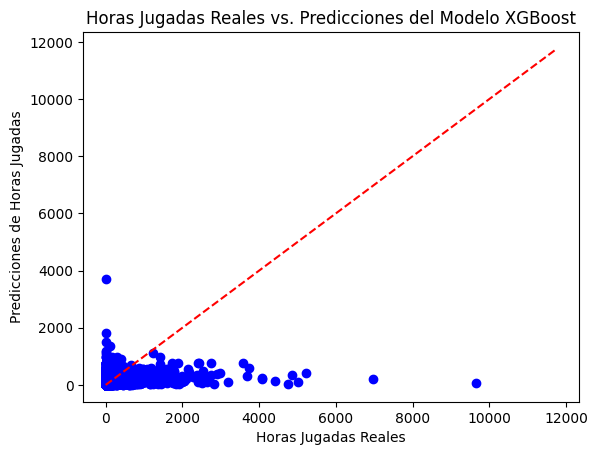

Proyecciones de horas jugadas para los próximos 2 años:
[16.149101 16.149101 24.431295 ... 32.901543 18.298262 18.298262]


In [ ]:
# Importación de bibliotecas necesarias
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from google.colab import files

# Subir y cargar el archivo
load = files.upload()  # Solo funciona en Google Colab
data = pd.read_csv('steam-200k.csv', header=None)  # Cargar sin encabezado

# Asignar nombres de columnas manualmente
data.columns = ['user-id', 'game-title', 'behavior-name', 'value', 'other']  # Ajusta si hay más columnas

# Verificar las primeras filas del conjunto de datos
print("Datos originales:")
print(data.head())

# Filtrar solo el comportamiento de 'play' (ya que queremos predecir horas jugadas)
data = data[data['behavior-name'] == 'play'].copy()

# Codificar variables categóricas
data = pd.get_dummies(data, columns=['game-title'], drop_first=True)

# Convertir el 'user-id' a numérico (opcional si se quiere agregar como una característica)
data['user-id'] = data['user-id'].astype('int64')

# Definir las características (X) y la variable objetivo (y)
X = data.drop(['value', 'behavior-name', 'other'], axis=1)  # Características
y = data['value']  # Variable objetivo: horas jugadas

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo XGBoost
model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir métricas de evaluación
print(f'MAE (Error Absoluto Medio): {mae}')
print(f'MSE (Error Cuadrático Medio): {mse}')
print(f'R² (Coeficiente de Determinación): {r2}')

# Visualización de las predicciones vs. valores reales
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Línea ideal
plt.xlabel('Horas Jugadas Reales')
plt.ylabel('Predicciones de Horas Jugadas')
plt.title('Horas Jugadas Reales vs. Predicciones del Modelo XGBoost')
plt.show()

# Proyección de las horas jugadas para los próximos 2 años
nuevos_datos = X_test.copy()  # Puedes usar una muestra o nuevos datos

# Realizar predicciones futuras
predicciones_futuras = model.predict(nuevos_datos)

# Mostrar las proyecciones
print("Proyecciones de horas jugadas para los próximos 2 años:")
print(predicciones_futuras)


In [ ]:
 n# Importación de bibliotecas necesarias
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Cargar el archivo de datos y revisar las columnas
data = pd.read_csv('steam-200k.csv')  # Asegúrate de que el nombre del archivo es correcto
print("Columnas del archivo:", data.columns)  # Muestra los nombres de las columnas

# Asignar nombres de columnas manualmente
data.columns = ['user-id', 'game-title', 'behavior-name', 'value', 'other']  # Ajusta si hay más columnas

# Si los nombres de las columnas son diferentes, ajústalos aquí
# Supongamos que el archivo tiene las siguientes columnas:
# 'user-id', 'game-title', 'behavior-name', 'value', 'other'
# Si estos nombres no coinciden, ajusta las siguientes líneas en consecuencia.

# Filtrar solo el comportamiento de 'play' (ajusta según el nombre de la columna real)
data = data[data['behavior-name'] == 'play'].copy()

# Codificar variables categóricas (ajusta el nombre de la columna de juego si es necesario)
data = pd.get_dummies(data, columns=['game-title'], drop_first=True)

# Definir las características (X) y la variable objetivo (y)
X = data.drop(['value', 'behavior-name'], axis=1, errors='ignore')  # Características
y = data['value']  # Variable objetivo: horas jugadas

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo XGBoost
model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir métricas de evaluación
print(f'MAE (Error Absoluto Medio): {mae}')
print(f'MSE (Error Cuadrático Medio): {mse}')
print(f'R² (Coeficiente de Determinación): {r2}')

# Proyección de horas jugadas para los próximos 2 años
# Generar nuevos datos de entrada para cada juego popular y predecir las horas jugadas
nuevos_datos = X_test.copy()
proyecciones = model.predict(nuevos_datos)

# Crear un DataFrame con los juegos y las horas proyectadas
proyecciones_df = pd.DataFrame({'game-title': X_test.columns[X_test.columns.str.startswith('game-title')], 'proyeccion_horas': proyecciones})
proyecciones_df = proyecciones_df.groupby('game-title').sum()

# Encontrar el juego más proyectado
juego_mas_jugado = proyecciones_df['proyeccion_horas'].idxmax()
horas_mas_jugado = proyecciones_df['proyeccion_horas'].max()

print(f"El juego proyectado a ser el más jugado en los próximos 2 años es: {juego_mas_jugado} con aproximadamente {horas_mas_jugado} horas.")

# Visualizar resultados
plt.figure(figsize=(10, 6))
proyecciones_df.sort_values(by='proyeccion_horas', ascending=False).head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 juegos proyectados con más horas jugadas en los próximos 2 años')
plt.xlabel('Juego')
plt.ylabel('Horas Proyectadas')
plt.show()



Columnas del archivo: Index(['151603712', 'The Elder Scrolls V Skyrim', 'purchase', '1.0', '0'], dtype='object')
MAE (Error Absoluto Medio): 61.45851699899725
MSE (Error Cuadrático Medio): 50582.786928062305
R² (Coeficiente de Determinación): 0.0534588506289525


ValueError: All arrays must be of the same length